In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

Data Collection

In [ ]:
data = pd.read_csv("/archive.zip" ,encoding = "latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Exploring the dataset

In [ ]:
## Basic info on data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
## Remove the Null Column
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"] ,axis = 1 ,inplace = True)
data.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
## Rename the column to appropriate name
data.rename(columns = {"v1":"target","v2":"sms"} ,inplace = True)
data.head(5)

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Data Cleaning

In [ ]:
## Check for Duplicates and Remove them
data.duplicated().sum() ## Will give us a number of duplicates
data.drop_duplicates(inplace = True)  ## Will drops any duplicates

In [ ]:
## Check for nan values

data.isna().sum()  # Will check for any duplicates
data.dropna( inplace = True ) ## Will drop any nan containing row if exists

In [ ]:
data.shape

(5169, 2)

In [ ]:
## function to preprocess the data
stopword = set(stopwords.words('english'))

def preprocessing(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)

    # Remove specific characters #, @, and $
    text = re.sub(r'[#@\$]', '', text)

    # tokenize and convert to list
    tokens = text.split()

    ## Lemmatize it

    ## lemmatize each token
    text = [token for token in tokens]

    text = [word for word in text if word not in stopword]


    return " ".join(text)

In [ ]:
## Create list of words in discription column
data["cleaned_sms"] =  data["sms"].apply(preprocessing)

In [ ]:
data.head()

,target,sms,cleaned_sms
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


Data Visualization

In [ ]:
# Check for imbalance data
data["target"].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

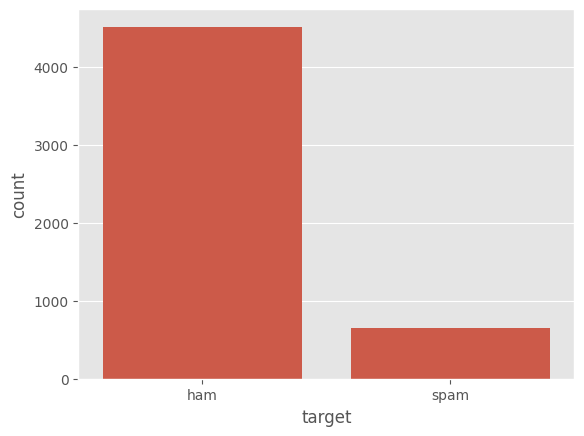

In [ ]:
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module
import seaborn as sns

## Plot countplot
plt.style.use("ggplot")
sns.countplot(x = "target", data = data)

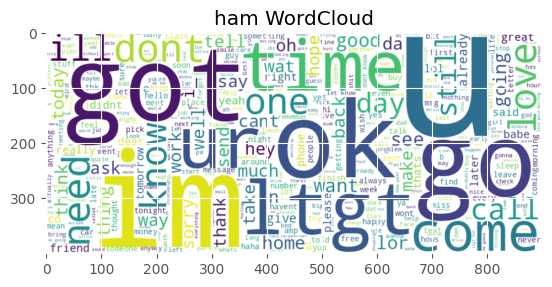

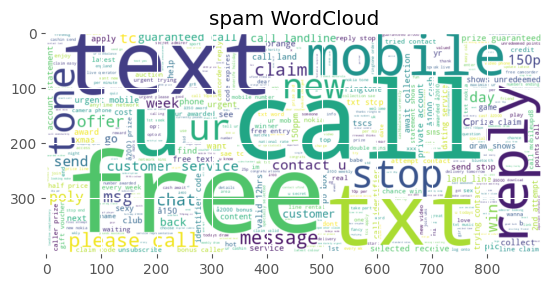

In [ ]:
## Check word cloud for ham and Spam
## Check for ham

for i in ["ham","spam"]:
    Words= " ".join(data.loc[data['target'] == i]["cleaned_sms"])

    wordcloud = WordCloud(max_words=400, width=900, height=400, background_color='white').generate(Words)
    plt.imshow(wordcloud , interpolation = "bilinear")
    plt.title(f"{i} WordCloud")
    plt.show()

Model Selection

In [ ]:
## import necessary library for
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['target_encoded'] = label_encoder.fit_transform(data['target'])


class_names= list(label_encoder.classes_)
class_names

['ham', 'spam']

In [ ]:
data.head()

,target,sms,cleaned_sms,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,0


Split the data to test and train

In [ ]:
## Split the data
x = data["cleaned_sms"]
y = data["target_encoded"]

## Using TfidfVectorizer technique
vectorizer = TfidfVectorizer()
x_trans= vectorizer.fit_transform(x)


x_train ,x_test ,y_train ,y_test = train_test_split(x_trans ,y ,test_size = 0.3 ,random_state = 42)

In [ ]:
print("x train ",x_train.shape )
print("x_test" ,x_test.shape)
print("y_train" ,y_train.shape)
print("y test" ,y_test.shape)

x train  (3618, 9403)
x_test (1551, 9403)
y_train (3618,)
y test (1551,)


Model Training and Testing

In [ ]:
## Function for training amd testing

def model_train_test(model):
    model.fit(x_train ,y_train)
    print("Model Score on Training data",model.score(x_train ,y_train))
    print("Model Score on Testing data",model.score(x_test ,y_test))
    y_pred = model.predict(x_test)
    print(classification_report(y_pred ,y_test))


    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
    sns.heatmap(cm, annot=True, fmt='d', cbar=False,
                xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    return model

MultinomialNB

Model Score on Training data 0.9654505251520177
Model Score on Testing data 0.9516441005802708
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1406
           1       0.66      1.00      0.79       145

    accuracy                           0.95      1551
   macro avg       0.83      0.97      0.88      1551
weighted avg       0.97      0.95      0.96      1551



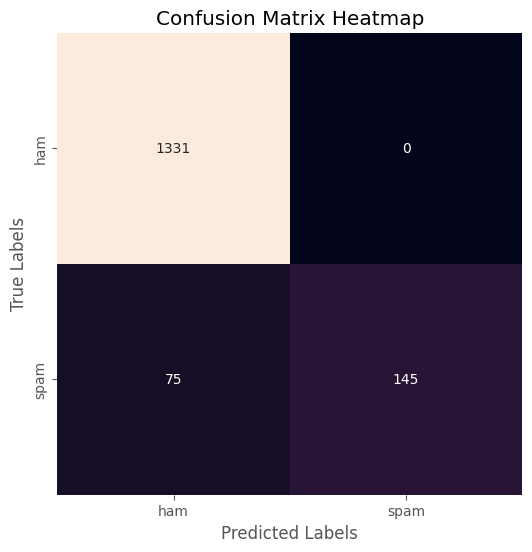

MultinomialNB()

In [ ]:
mnb = MultinomialNB()
model_train_test(mnb)

LogisticRegression

Model Score on Training data 0.9524599226091763
Model Score on Testing data 0.9284332688588007
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1428
           1       0.53      0.94      0.68       123

    accuracy                           0.93      1551
   macro avg       0.76      0.94      0.82      1551
weighted avg       0.96      0.93      0.94      1551



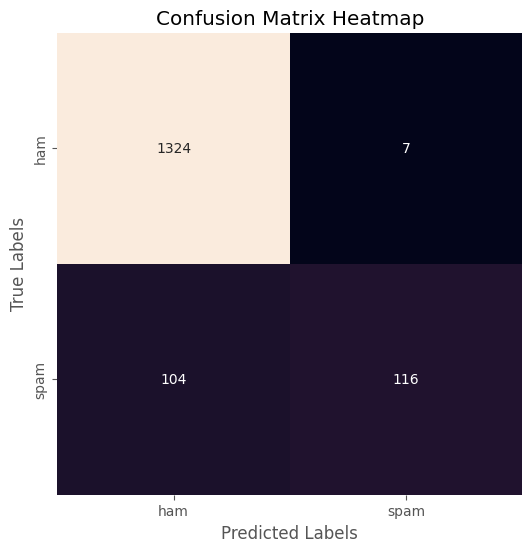

LogisticRegression()

In [ ]:
lr = LogisticRegression()
model_train_test(lr)

Support Vector Machine

Model Score on Training data 0.9975124378109452
Model Score on Testing data 0.9754996776273372
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1365
           1       0.84      0.99      0.91       186

    accuracy                           0.98      1551
   macro avg       0.92      0.98      0.95      1551
weighted avg       0.98      0.98      0.98      1551



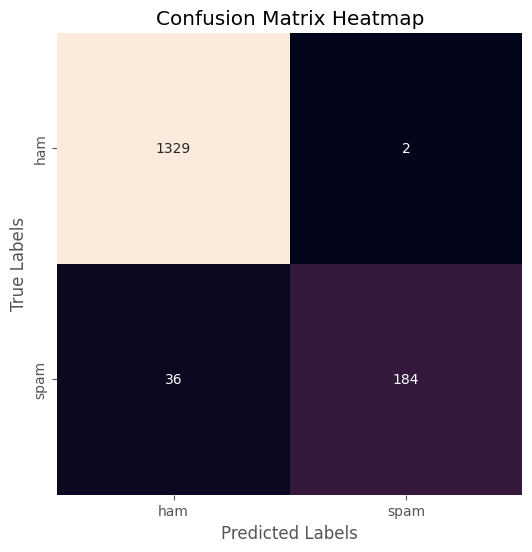

In [ ]:
svc = SVC(C=1.2 ,kernel = "linear")
model = model_train_test(svc)

Deployment

In [ ]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=vectorizer.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]== 0):
    print("Ham Mail")
else:
    print("Spam Mail")

[0]
Ham Mail
